In [3]:
import numpy as np
import pandas as pd
import pickle 
import nltk
from nltk.corpus import stopwords
from sklearn.datasets import load_files
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
import nltk as nlp
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oktay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
dataset = pd.read_csv("Trendyol.csv")

#Reading the datas that we classified.

In [6]:
#Defining the classes for çok iyi, iyi, orta, kötü, çok kötü

Çokiyi = dataset[dataset.Class == 5]
İyi = dataset[dataset.Class == 4]
Orta = dataset[dataset.Class == 3]
Kötü = dataset[dataset.Class == 2]
ÇokKötü = dataset[dataset.Class == 1]

In [7]:
dataset


,Entries,Class
0,aldigim ayakkabiyi ayni gün kargolayarak beni ...,5
1,sürekli alisveris yaptigimdan tüm kargo firmal...,5
2,bu zamana kadar 2 casio ve 1 fossil marka saat...,5
3,karisik duygular besliyorum su ana kadar alisv...,5
4,alibaba ile yaptiklari yatirim anlasmasi ile a...,5
5,7 yildir sürekli olarak alisveris yaptigim hat...,5
6,Ilk kez alisveris yaptim. üründe bir ariza olu...,5
7,çilginlar gibi alis veris yaptigim site keske ...,5
8,online alisveris bagimlisi biri olarak eticare...,5
9,en sevdigim alisveris sitelerinden biridir ara...,5


In [8]:
from nltk.stem import WordNetLemmatizer
lema = WordNetLemmatizer()

# stopwordsleri sil
from nltk.corpus import stopwords
stop = stopwords.words('turkish')

from textblob import TextBlob

# Cleaning Data for All Entries

In [9]:
#Cleaning the entries from non alphabetical values and numerical values.
Entries_list = []
for Entries in dataset.Entries:
    Entries = Entries.lower()
    Entries = re.sub("[^abcçdefgğhıijklmnoöprsştuüvyz]"," ",Entries) # a-z dışındakileri boşlukla değiştir
    Entries =nltk.word_tokenize(Entries)
    Entries =[word for word in Entries if not word in set(stopwords.words("turkish"))]
    lemma = nlp.WordNetLemmatizer()
    Entries = [lemma.lemmatize(word) for word in Entries]
    Entries = " ".join(Entries)
    Entries_list.append(Entries)
Entries_list

['aldigim ayakkabiyi ayni gün kargolayarak beni utandiran firma uzun zaman olmustu buradan alisveris yapmayali sasirdim',
 'sürekli alisveris yaptigimdan kargo firmalarinin çalisanlarinin beni tanimasina sebep olan site gün birisi lab a geldi sormadan buyrun meriç hanim diyerek kargomu verdi sag olsun yildir alisveris yapiyorum kredi kartim sitede kayitli güne kadar herhangi bir sekilde iade kredi karti ürünlerle ilgili hiçbir sorunla karsilasmadim hatta bir ürünü tedarik edemediler özür olsun siparis üzerinde indirim yapip üstüne bir hediye kuponu vermislerdi müsteri hizmetleri ilgili telefon email araciligiyla ulastiginizda sorununuza hemen çözüm buluyorlar',
 'zamana kadar casio fossil marka saat aldim iyiydi özel kutusunda garanti belgeli v geldi bir tane babama parfüm aldim babalar gününde vermek pek incelemedim dogrusu insallah sahte degildir tanim alisveris sitesi',
 'karisik duygular besliyorum su ana kadar alisverislerde sorun yasamadim elite üyeligim oldugu kargo ödemiyorum k

In [10]:
def preprocessing(Entries_list):
    Entries_list = Entries_list.lower()
    #get rid of non-alphanumerical characters
    #Entries_list = re.sub(r'\W', ' ', Entries_list) 
    #get rid of spaces
    #Entries_list = re.sub(r'\s+', ' ', Entries_list) 
    #Correct mistakes 
    #and do the stemming
    return " ".join([lema.lemmatize(str(TextBlob(word).correct())) 
                 for word in Entries_list.split() if word not in stop])

In [16]:
def preprocess(text):
    return [w for w in text.split() if w not in stop]

In [17]:
preprocess(Entries_list[0])

['aldigim',
 'ayakkabiyi',
 'ayni',
 'gün',
 'kargolayarak',
 'beni',
 'utandiran',
 'firma',
 'uzun',
 'zaman',
 'olmustu',
 'buradan',
 'alisveris',
 'yapmayali',
 'sasirdim']

In [58]:
X = [preprocessing(x) for x in Entries]
X

['b',
 'u',
 'g',
 'u',
 'n',
 'e',
 '',
 'k',
 '',
 '',
 '',
 'r',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'g',
 '',
 '',
 '',
 'k',
 'ö',
 '',
 'ü',
 '',
 '',
 'l',
 '',
 '',
 'v',
 'e',
 'r',
 '',
 '',
 '',
 '',
 'e',
 'n',
 'e',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'n',
 '',
 '',
 '',
 '',
 'e']

# Term Frequency


In [59]:
words = {w for d in X for w in d.split()}
words

{'b', 'e', 'g', 'k', 'l', 'n', 'r', 'u', 'v', 'ö', 'ü'}

In [60]:
def term_frequency(d):
    tf = {w:0 for w in words}
    for w in d.split():
        if w in tf:
            tf[w] += 1
    return pd.Series(tf)

In [61]:
tf = pd.DataFrame(columns=words)
for i in range(len(X)):
    tf.loc[i] = term_frequency(X[i])


In [62]:
tf

,n,v,ö,g,r,b,u,ü,e,k,l
0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0


# Inverse Document Frequency

N: Number of documents in the corpus
N_w : Number of documents containing word w



In [63]:
N = len(X)
N

59

In [64]:
Entries_list

['aldigim ayakkabiyi ayni gün kargolayarak beni utandiran firma uzun zaman olmustu buradan alisveris yapmayali sasirdim',
 'sürekli alisveris yaptigimdan kargo firmalarinin çalisanlarinin beni tanimasina sebep olan site gün birisi lab a geldi sormadan buyrun meriç hanim diyerek kargomu verdi sag olsun yildir alisveris yapiyorum kredi kartim sitede kayitli güne kadar herhangi bir sekilde iade kredi karti ürünlerle ilgili hiçbir sorunla karsilasmadim hatta bir ürünü tedarik edemediler özür olsun siparis üzerinde indirim yapip üstüne bir hediye kuponu vermislerdi müsteri hizmetleri ilgili telefon email araciligiyla ulastiginizda sorununuza hemen çözüm buluyorlar',
 'zamana kadar casio fossil marka saat aldim iyiydi özel kutusunda garanti belgeli v geldi bir tane babama parfüm aldim babalar gününde vermek pek incelemedim dogrusu insallah sahte degildir tanim alisveris sitesi',
 'karisik duygular besliyorum su ana kadar alisverislerde sorun yasamadim elite üyeligim oldugu kargo ödemiyorum k

In [65]:
def inverse_document_freq(w, X):
    N = len(X)
    N_d = 0
    for d in X: 
        if w in d.split():
            N_d += 1
    return 1 + np.log((N+1)/(N_d+1))

In [66]:
idfs = [(w,inverse_document_freq(w, X)) for w in words]
idfs

[('n', 3.70805020110221),
 ('v', 4.401197381662156),
 ('ö', 4.401197381662156),
 ('g', 3.995732273553991),
 ('r', 3.995732273553991),
 ('b', 4.401197381662156),
 ('u', 3.995732273553991),
 ('ü', 4.401197381662156),
 ('e', 3.302585092994046),
 ('k', 3.995732273553991),
 ('l', 4.401197381662156)]

In [67]:
for c, idf in idfs:
    tf[c] *= idf

In [68]:
tf

,n,v,ö,g,r,b,u,ü,e,k,l
0,0,0,0,0,0,4.4012,0,0,0,0,0
1,0,0,0,0,0,0,3.99573,0,0,0,0
2,0,0,0,3.99573,0,0,0,0,0,0,0
3,0,0,0,0,0,0,3.99573,0,0,0,0
4,3.70805,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,3.30259,0,0
6,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,3.99573,0
8,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0


In [69]:
from sklearn.preprocessing import normalize
normalize(tf)

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

# SK-LEARN TF-IDF Model


In [70]:
# Creating the Tf-Idf model directly
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(norm = None, smooth_idf=True)
tX = vectorizer.fit_transform(Entries_list).toarray()
tX

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [71]:
y = dataset.iloc[:,1].values
x = tX

# Naive Bayes


In [72]:
# %% cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
#Train-Test Split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 40) # x ve y train i kullanarak train edip x i test edip y test le karşılaştırıcaz


In [73]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB(priors=None)

In [74]:
y_pred = nb.predict(x_test)
print("Naive Bayes algorithm accuracy: ",nb.score(y_pred.reshape(-1,1),y_test))

Naive Bayes algorithm accuracy:  0.37666666666666665


In [75]:
#CONFUSİON MATRİX FOR NAIVE BAYES
y_pred = nb.predict(x_test)
y_true = y_test
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_pred)


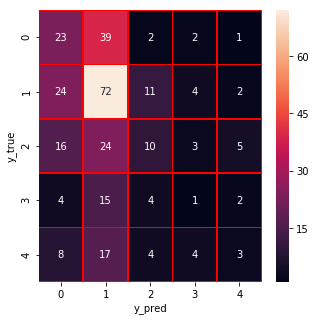

In [76]:
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Decision Tree

In [77]:
# %% train test split
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 40)

In [78]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [79]:
print("Decision Tree algorithm accuracy: ", dt.score(x_test,y_test))

Decision Tree algorithm accuracy:  0.3233333333333333


In [80]:
#CONFUSİON MATRİX FOR DESICION TREE
y_pred = dt.predict(x_test)
y_true = y_test
#%% confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_pred)

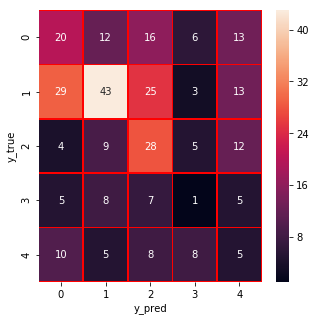

In [81]:
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Random Forest 

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
rf = RandomForestClassifier(n_estimators = 100,random_state = 40)
rf.fit(x_train,y_train)
print("Random Forest algorithm accuracy: ",rf.score(x_test,y_test))

Random Forest algorithm accuracy:  0.41


In [84]:
#CONFUSİON MATRİX FOR RANDOM FOREST
y_pred = rf.predict(x_test)
y_true = y_test
#%% confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_pred)

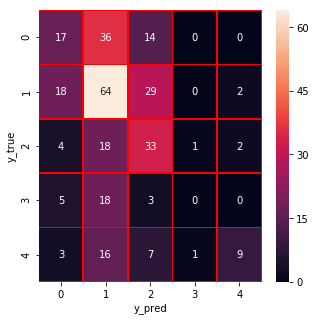

In [85]:
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Linear SVM algorithm

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
model = LinearSVC()
x_train, x_test, y_train, y_test, indices_train, indices_test = train_test_split(x, y, Entries_list, test_size=0.20, random_state=40)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [87]:
print("Linear SVM algorithm accuracy: ",model.score(x_test,y_test))

Linear SVM algorithm accuracy:  0.37666666666666665


In [88]:
#CONFUSİON MATRİX FOR lINEAR SVM
y_pred = model.predict(x_test)
y_true = y_test
#%% confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_pred)


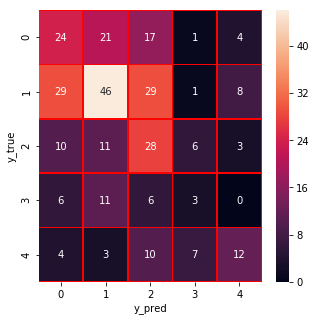

In [89]:
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()